# Perturbation effect
In this section, we will explore the effect of small perturbation on choreography system.

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def force(r1,r2,m1,m2):
    """Force function is define to be used repeatly throughout the mini-projection 
    to calculate the force of one body on other body.
    
    Inputs:
    r1 - position of mass 1
    r2 - position of mass 2
    m1 - mass 1
    m2 - mass 2
    # G is defined outside of this function
    
    Returns:
    Force - force experienced by mass 1
    
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    
    
    mag_r12 = np.linalg.norm(r2-r1) # np.linalg.norm helps to find the magnitude of a vector
    f_on_m1 = G*m1*m2*r12/(mag_r12**3)
    return f_on_m1

## Small Perturbation to the Figure-Eight Choreography
A small additional perturbation is added by increasing the initial velocity of the masses by 2%.

In [15]:
m1 = 1
m2 = 1   # mass 2
m3 = 1 # lightest mass 3
N= 30000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities 
# Obj_2 - position of the second object
# Obj_3 - position of the third and lightest object
Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_3_r = np.zeros((N,Ndim))

Obj_2_v= np.zeros(( N ,Ndim  ))
Obj_3_v = np.zeros(( N ,Ndim  ))


# Total energy and angular momentum storage

KE_LS= np.zeros(N)
PE_LS= np.zeros(N)
L_LS= np.zeros(N)



# Initial Condition
'''
Placing the three body along a collinear line such that the sum of the position of all the bodies is zero. This is
also the case for the initial velocity
'''

Obj_1_r[0] = np.array([1,0])
Obj_2_r[0] = np.array([-1,0])
Obj_3_r[0] = np.array([0,0])

# Body 3 have double the velocity relative to the other body

# setting velocities along the horizontal and vertical direction which is given by the research paper
v=0.347116768716
u=0.532724944657

Obj_1_v[0] = np.array([v*1.02,u*1.02])
Obj_2_v[0] = np.array([v*1.02,u*1.02])
Obj_3_v[0] = np.array([-2*v*1.02,-2*u*1.02])

In [16]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
    Force_on_2 = force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
    Force_on_3 = force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    
    # Forces on objects at step i+1
    Force_on_1_ip1 = force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
    Force_on_2_ip1 = force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
    Force_on_3_ip1 = force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
    
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    
    # Kinetic Energy Calculation
    KE_LS[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               +(0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2)))
    
    # Potential Energy Calculation
    
    PE_LS[i]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[i]-Obj_1_r[i]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]) ) )
    
    '''
    Because the angle between the position vector is not always perpendicular to the velocity vector,
    we need to use scalar product to resolve velocity along a direction perpendicular to the positional
    vector.
    '''
    
    L_LS[i] = (np.linalg.norm(np.cross(Obj_1_v[i],Obj_1_r[i]))
              + np.linalg.norm(np.cross(Obj_2_v[i],Obj_2_r[i]))
              + np.linalg.norm(np.cross(Obj_3_v[i],Obj_3_r[i]))        )
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_LS[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)) +(0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2)))

PE_LS[-1]= ((-G*m1*m2/ np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1]) ) +(-G*m1*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-G*m2*m3/ np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]) ) )

L_LS[-1] = (np.linalg.norm(np.cross(Obj_1_v[-1],Obj_1_r[-1]))
              + np.linalg.norm(np.cross(Obj_2_v[-1],Obj_2_r[-1]))
              + np.linalg.norm(np.cross(Obj_3_v[-1],Obj_3_r[-1]))        )

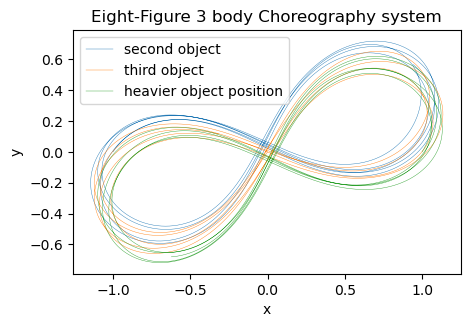

In [17]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='second object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='third object ',lw=0.3)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='heavier object position',lw=0.3)
ax.set_title('Eight-Figure 3 body Choreography system')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')
plt.gca().set_aspect(1)

[1.08675889 1.08675794 1.0867551  ... 1.08356143 1.08373008 1.08389899]


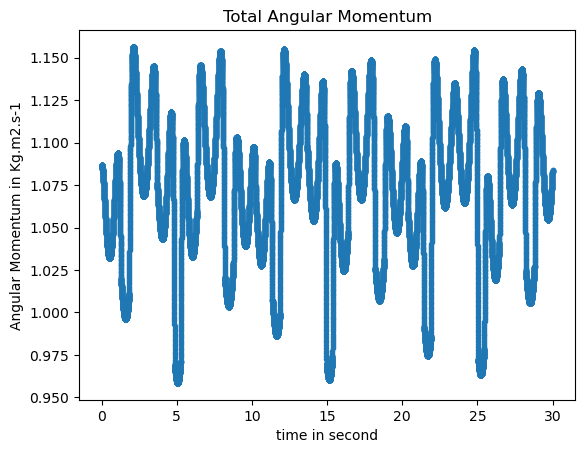

In [18]:
time=np.linspace(0,N*dt,N)
plt.plot(time,L_LS,marker='.')
plt.title('Total Angular Momentum')
plt.xlabel('time in second')
plt.ylabel('Angular Momentum in Kg.m2.s-1')
print(L_LS)

Text(0, 0.5, 'Total Energy in Joules')

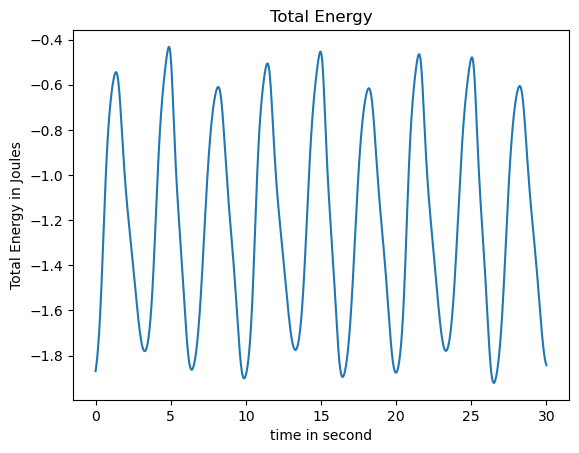

In [19]:

Total_Energy_LS = PE_LS+KE_LS
plt.plot(time,Total_Energy_LS)
plt.title('Total Energy')
plt.xlabel('time in second')
plt.ylabel('Total Energy in Joules')

## Small Perturbation to the 4-body Braids Choreography
A small additional perturbation is added by increasing the initial velocity of the masses by 0.05%.

In [20]:
# Same mass 
m1=1
m2=1
m3=1
m4=1

N= 8000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities for all the eight bodies

Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_2_v = np.zeros((N,Ndim))

Obj_3_r = np.zeros((N,Ndim))
Obj_3_v = np.zeros((N,Ndim))

Obj_4_r = np.zeros((N,Ndim))
Obj_4_v = np.zeros((N,Ndim))


# Total energy and angular momentum storage

KE_8_C= np.zeros(N)
PE_8_C= np.zeros(N)
L_8_C= np.zeros(N)

# Initial condition explanations
'''The initial conditions are given by data from the research paper.
'''
x1 = 1.382857
x0_v= 1.87193510824
y1_v= 0.584872579881
a = 0.157029944461

Obj_1_r[0] = np.array([0,a])
Obj_2_r[0] = np.array([x1,0])
Obj_3_r[0] = np.array([0,-a])
Obj_4_r[0] = np.array([-x1,0])



Obj_1_v[0] = np.array([x0_v,0]) * 1.0005
Obj_2_v[0] = np.array([0,y1_v]) * 1.0005
Obj_3_v[0] = np.array([-x0_v,0]) * 1.0005
Obj_4_v[0] = np.array([0,-y1_v]) * 1.0005


In [21]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = ( force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
                  + force(Obj_1_r[i], Obj_4_r[i], m1 , m4) )
    
    Force_on_2 = ( force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
                  + force(Obj_2_r[i], Obj_4_r[i], m4 , m2) 
                 )
    
    
    Force_on_3 = ( force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
                  + force(Obj_3_r[i], Obj_4_r[i], m4 , m3) 
                 )
    
    Force_on_4 = ( force(Obj_4_r[i], Obj_1_r[i], m1 , m4) + force(Obj_4_r[i],Obj_2_r[i],m2,m4)
                  + force(Obj_4_r[i], Obj_3_r[i], m4 , m3)
                 )
    

    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    Obj_4_r[i+1] = Obj_4_r[i] + (dt* Obj_4_v[i]) + (dt**2) * (Force_on_4/(2*m4))

    # Forces on objects at step i+1
    
    Force_on_1_ip1 = ( force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
                  + force(Obj_1_r[i+1], Obj_4_r[i+1], m1 , m4) )
    
    Force_on_2_ip1 = ( force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
                  + force(Obj_2_r[i+1], Obj_4_r[i+1], m4 , m2)
                 )
    
    
    Force_on_3_ip1 = ( force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
                  + force(Obj_3_r[i+1], Obj_4_r[i+1], m4 , m3)
                 )
    
    Force_on_4_ip1 = ( force(Obj_4_r[i+1], Obj_1_r[i+1], m1 , m4) + force(Obj_4_r[i+1],Obj_2_r[i+1],m2,m4)
                  + force(Obj_4_r[i+1], Obj_3_r[i+1], m4 , m3) 
                 )
   
    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    Obj_4_v[i+1] = Obj_4_v[i] + dt*(Force_on_4+Force_on_4_ip1)/(2*m4)

    # Kinetic Energy Calculation
    KE_8_C[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[i])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[i])**2))
               )
    
    PE_8_C[i]=( (-1/np.linalg.norm(Obj_2_r[i]-Obj_1_r[i])) + (-1/np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]))
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_4_r[i]-Obj_3_r[i]) ))
          
    
    L_8_C[i] = (np.linalg.norm(np.cross(Obj_1_v[i],Obj_1_r[i]))
              + np.linalg.norm(np.cross(Obj_2_v[i],Obj_2_r[i]))
              + np.linalg.norm(np.cross(Obj_3_v[i],Obj_3_r[i]))
              + np.linalg.norm(np.cross(Obj_4_v[i],Obj_4_r[i])))
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_8_C[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[-1])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[-1])**2))
               )

PE_8_C[-1]=( (-1/np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1])) + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]))
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_3_r[-1]) ))

L_8_C[-1] = (np.linalg.norm(np.cross(Obj_1_v[-1],Obj_1_r[-1]))
              + np.linalg.norm(np.cross(Obj_2_v[-1],Obj_2_r[-1]))
              + np.linalg.norm(np.cross(Obj_3_v[-1],Obj_3_r[-1]))
              + np.linalg.norm(np.cross(Obj_4_v[-1],Obj_4_r[-1])))


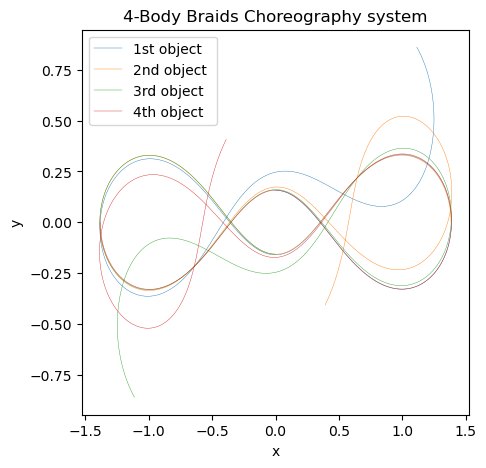

In [22]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='1st object ',lw=0.3)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='2nd object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='3rd object ',lw=0.3)
ax.plot(Obj_4_r[:,0],Obj_4_r[:,1],label='4th object ',lw=0.3)
ax.set_title('4-Body Braids Choreography system')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

[-6.41976776 -6.41965317 -6.41930951 ... -3.88428826 -3.8838934
 -3.88350306]


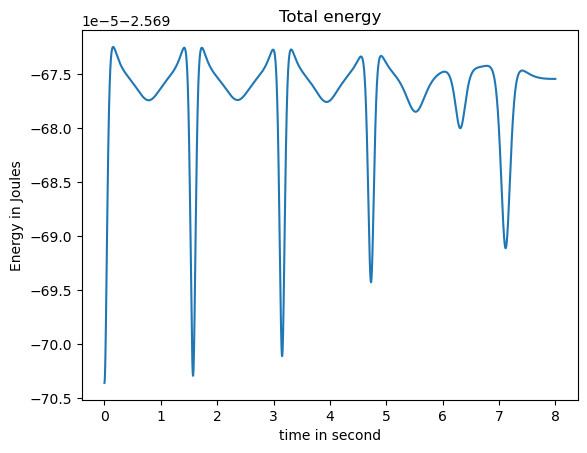

In [23]:
time=np.linspace(0,N*dt,N)
Total_E_8 = KE_8_C + PE_8_C
plt.plot(time,Total_E_8)
plt.title('Total energy')
plt.xlabel('time in second')
plt.ylabel('Energy in Joules')
print(PE_8_C)



Text(0, 0.5, 'Angular momentum in Kg.m2.s-1')

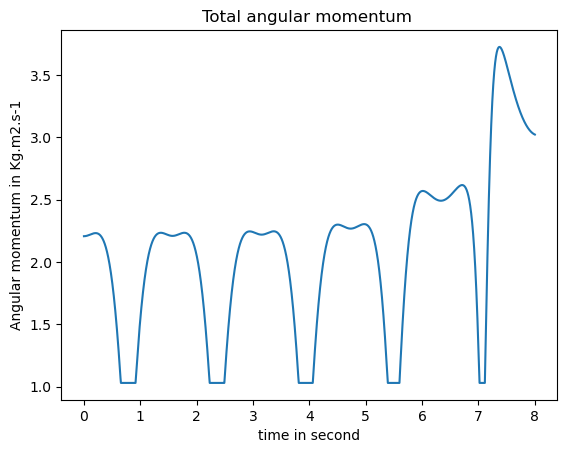

In [24]:
plt.plot(time,L_8_C)
plt.title('Total angular momentum ')
plt.xlabel('time in second')
plt.ylabel('Angular momentum in Kg.m2.s-1')

## Small Perturbation to the 4-body Braids Choreography
A small additional perturbation is added by increasing the initial velocity of the masses by 0.01%.

In [25]:
# Same mass 
m1=1
m2=1
m3=1
m4=1
m5=1
m6=1

N= 4000
Ndim=2
G=1
dt=0.001
# Storage for positions, velocities for all the eight bodies

Obj_1_r = np.zeros((N,Ndim))
Obj_1_v = np.zeros((N,Ndim))

Obj_2_r = np.zeros((N,Ndim))
Obj_2_v = np.zeros((N,Ndim))

Obj_3_r = np.zeros((N,Ndim))
Obj_3_v = np.zeros((N,Ndim))

Obj_4_r = np.zeros((N,Ndim))
Obj_4_v = np.zeros((N,Ndim))

Obj_5_r = np.zeros((N,Ndim))
Obj_5_v = np.zeros((N,Ndim))

Obj_6_r = np.zeros((N,Ndim))
Obj_6_v = np.zeros((N,Ndim))

# Total energy and angular momentum storage

KE_8_C= np.zeros(N)
PE_8_C= np.zeros(N)
L_8_C= np.zeros(N)

# Initial condition explanations
'''All Initial conditions are given by the research paper.
'''

x0_v = -0.635277524319
x1 = 0.140342838651
y1 = 0.797833002006
x1_v = 0.100637737317 
y1_v = - 2.0315222786

a=1.887041548253914

Obj_1_r[0] = np.array([x1,-y1])
Obj_2_r[0] = np.array([0,-a])
Obj_3_r[0] = np.array([-x1,-y1])
Obj_4_r[0] = np.array([0,a])
Obj_5_r[0] = np.array([x1,y1])
Obj_6_r[0] = np.array([-x1,y1])


Obj_1_v[0] = np.array([-x1_v,y1_v]) *1.0001
Obj_2_v[0] = np.array([-x0_v,0]) *1.0001
Obj_3_v[0] = np.array([-x1_v,-y1_v])*1.0001
Obj_4_v[0] = np.array([x0_v,0])*1.0001
Obj_5_v[0] = np.array([x1_v,y1_v])*1.0001
Obj_6_v[0] = np.array([x1_v,-y1_v])*1.0001


In [29]:
for i in range(N-1):
    # Forces on objects at step i
    Force_on_1 = ( force(Obj_1_r[i], Obj_2_r[i], m1 , m2) + force(Obj_1_r[i],Obj_3_r[i],m1,m3)
                  + force(Obj_1_r[i], Obj_4_r[i], m1 , m4) + force(Obj_1_r[i], Obj_5_r[i], m1 , m5)
                  + force(Obj_1_r[i], Obj_6_r[i], m1 , m6)    )
    
    Force_on_2 = ( force(Obj_2_r[i], Obj_1_r[i], m1 , m2) + force(Obj_2_r[i],Obj_3_r[i],m2,m3)
                  + force(Obj_2_r[i], Obj_4_r[i], m4 , m2) + force(Obj_2_r[i], Obj_5_r[i], m5 , m2)
                  + force(Obj_2_r[i], Obj_6_r[i], m6 , m2) 
                 )
    
    
    Force_on_3 = ( force(Obj_3_r[i], Obj_1_r[i], m1 , m3) + force(Obj_3_r[i],Obj_2_r[i],m2,m3)
                  + force(Obj_3_r[i], Obj_4_r[i], m4 , m3) + force(Obj_3_r[i], Obj_5_r[i], m5 , m3)
                  + force(Obj_3_r[i], Obj_6_r[i], m6 , m3) 
                 )
    
    Force_on_4 = ( force(Obj_4_r[i], Obj_1_r[i], m1 , m4) + force(Obj_4_r[i],Obj_2_r[i],m2,m4)
                  + force(Obj_4_r[i], Obj_3_r[i], m4 , m3) + force(Obj_4_r[i], Obj_5_r[i], m5 , m4)
                  + force(Obj_4_r[i], Obj_6_r[i], m6 , m4) 
                 )
    
    Force_on_5 = ( force(Obj_5_r[i], Obj_1_r[i], m1 , m5) + force(Obj_5_r[i],Obj_2_r[i],m2,m5)
                  + force(Obj_5_r[i], Obj_3_r[i], m5 , m3) + force(Obj_5_r[i], Obj_4_r[i], m5 , m4)
                  + force(Obj_5_r[i], Obj_6_r[i], m5 , m6)
                 )
    
    Force_on_6 = ( force(Obj_6_r[i], Obj_1_r[i], m1 , m6) + force(Obj_6_r[i],Obj_2_r[i],m2,m6)
                  + force(Obj_6_r[i], Obj_3_r[i], m6 , m3) + force(Obj_6_r[i], Obj_4_r[i], m6 , m4)
                  + force(Obj_6_r[i], Obj_5_r[i], m6 , m5) 
                 )

    
    
    # updating position using velocity Verlet Integrator
    Obj_1_r[i+1] = Obj_1_r[i] + (dt* Obj_1_v[i]) + (dt**2) * (Force_on_1/(2*m1))
    Obj_2_r[i+1] = Obj_2_r[i] + (dt* Obj_2_v[i]) + (dt**2) * (Force_on_2/(2*m2))
    Obj_3_r[i+1] = Obj_3_r[i] + (dt* Obj_3_v[i]) + (dt**2) * (Force_on_3/(2*m3))
    Obj_4_r[i+1] = Obj_4_r[i] + (dt* Obj_4_v[i]) + (dt**2) * (Force_on_4/(2*m4))
    Obj_5_r[i+1] = Obj_5_r[i] + (dt* Obj_5_v[i]) + (dt**2) * (Force_on_5/(2*m5))
    Obj_6_r[i+1] = Obj_6_r[i] + (dt* Obj_6_v[i]) + (dt**2) * (Force_on_6/(2*m6))
    
    # Forces on objects at step i+1
    
    Force_on_1_ip1 = ( force(Obj_1_r[i+1], Obj_2_r[i+1], m1 , m2) + force(Obj_1_r[i+1],Obj_3_r[i+1],m1,m3)
                  + force(Obj_1_r[i+1], Obj_4_r[i+1], m1 , m4) + force(Obj_1_r[i+1], Obj_5_r[i+1], m1 , m5)
                  + force(Obj_1_r[i+1], Obj_6_r[i+1], m1 , m6) )
    
    Force_on_2_ip1 = ( force(Obj_2_r[i+1], Obj_1_r[i+1], m1 , m2) + force(Obj_2_r[i+1],Obj_3_r[i+1],m2,m3)
                  + force(Obj_2_r[i+1], Obj_4_r[i+1], m4 , m2) + force(Obj_2_r[i+1], Obj_5_r[i+1], m5 , m2)
                  + force(Obj_2_r[i+1], Obj_6_r[i+1], m6 , m2) 
                 )
    
    
    Force_on_3_ip1 = ( force(Obj_3_r[i+1], Obj_1_r[i+1], m1 , m3) + force(Obj_3_r[i+1],Obj_2_r[i+1],m2,m3)
                  + force(Obj_3_r[i+1], Obj_4_r[i+1], m4 , m3) + force(Obj_3_r[i+1], Obj_5_r[i+1], m5 , m3)
                  + force(Obj_3_r[i+1], Obj_6_r[i+1], m6 , m3)
                 )
    
    Force_on_4_ip1 = ( force(Obj_4_r[i+1], Obj_1_r[i+1], m1 , m4) + force(Obj_4_r[i+1],Obj_2_r[i+1],m2,m4)
                  + force(Obj_4_r[i+1], Obj_3_r[i+1], m4 , m3) + force(Obj_4_r[i+1], Obj_5_r[i+1], m5 , m4)
                  + force(Obj_4_r[i+1], Obj_6_r[i+1], m6 , m4)
                 )
    
    Force_on_5_ip1 = ( force(Obj_5_r[i+1], Obj_1_r[i+1], m1 , m5) + force(Obj_5_r[i+1],Obj_2_r[i+1],m2,m5)
                  + force(Obj_5_r[i+1], Obj_3_r[i+1], m5 , m3) + force(Obj_5_r[i+1], Obj_4_r[i+1], m5 , m4)
                  + force(Obj_5_r[i+1], Obj_6_r[i+1], m5 , m6) 
                 )
    
    Force_on_6_ip1 = ( force(Obj_6_r[i+1], Obj_1_r[i+1], m1 , m6) + force(Obj_6_r[i+1],Obj_2_r[i+1],m2,m6)
                  + force(Obj_6_r[i+1], Obj_3_r[i+1], m6 , m3) + force(Obj_6_r[i+1], Obj_4_r[i+1], m6 , m4)
                  + force(Obj_6_r[i+1], Obj_5_r[i+1], m6 , m5)
                 )
    
   
    

    #updating velocity using velocity Verlet Integrator
    Obj_1_v[i+1] = Obj_1_v[i] + dt*(Force_on_1+Force_on_1_ip1)/(2*m1)
    Obj_2_v[i+1] = Obj_2_v[i] + dt*(Force_on_2+Force_on_2_ip1)/(2*m2)
    Obj_3_v[i+1] = Obj_3_v[i] + dt*(Force_on_3+Force_on_3_ip1)/(2*m3)
    Obj_4_v[i+1] = Obj_4_v[i] + dt*(Force_on_4+Force_on_4_ip1)/(2*m4)
    Obj_5_v[i+1] = Obj_5_v[i] + dt*(Force_on_5+Force_on_5_ip1)/(2*m5)
    Obj_6_v[i+1] = Obj_6_v[i] + dt*(Force_on_6+Force_on_6_ip1)/(2*m6)
    
    # Kinetic Energy Calculation
    KE_8_C[i]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[i])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[i])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[i])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[i])**2))
               + (0.5 * (m5*np.linalg.norm(Obj_5_v[i])**2)) + (0.5 * (m6*np.linalg.norm(Obj_6_v[i])**2))
               )
    
    PE_8_C[i]=( (-1/np.linalg.norm(Obj_2_r[i]-Obj_1_r[i])) + (-1/np.linalg.norm(Obj_3_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_5_r[i]-Obj_1_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_1_r[i]) )  + (-1/np.linalg.norm(Obj_3_r[i]-Obj_2_r[i]))
          + (-1/np.linalg.norm(Obj_4_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_5_r[i]-Obj_2_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_2_r[i]) ) + (-1/np.linalg.norm(Obj_4_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_5_r[i]-Obj_3_r[i]) ) + (-1/np.linalg.norm(Obj_6_r[i]-Obj_3_r[i]) )
          + (-1/np.linalg.norm(Obj_5_r[i]-Obj_4_r[i]) ) + (-1/np.linalg.norm(Obj_6_r[i]-Obj_4_r[i]) )
          + (-1/np.linalg.norm(Obj_6_r[i]-Obj_5_r[i]) ))
              
    
    
    L_8_C[i] = ( np.linalg.norm(np.cross(Obj_1_r[i],Obj_1_v[i]))
                +np.linalg.norm(np.cross(Obj_2_r[i],Obj_2_v[i]))
                +np.linalg.norm(np.cross(Obj_3_r[i],Obj_3_v[i]))
                +np.linalg.norm(np.cross(Obj_4_r[i],Obj_4_v[i]))
                +np.linalg.norm(np.cross(Obj_5_r[i],Obj_5_v[i]))
                +np.linalg.norm(np.cross(Obj_6_r[i],Obj_6_v[i]))
               )
           
    
    
# Manually setting the last element in the KE, PE and angular momentum array as the loop ends at the second last element
KE_8_C[-1]= ((0.5 * (m1*np.linalg.norm(Obj_1_v[-1])**2) )+ (0.5 * (m2*np.linalg.norm(Obj_2_v[-1])**2))
               + (0.5 * (m3*np.linalg.norm(Obj_3_v[-1])**2)) + (0.5 * (m4*np.linalg.norm(Obj_4_v[-1])**2))
               + (0.5 * (m5*np.linalg.norm(Obj_5_v[-1])**2)) + (0.5 * (m6*np.linalg.norm(Obj_6_v[-1])**2))
               )

PE_8_C[-1]=( (-1/np.linalg.norm(Obj_2_r[-1]-Obj_1_r[-1])) + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_1_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_1_r[-1]) )  + (-1/np.linalg.norm(Obj_3_r[-1]-Obj_2_r[-1]))
          + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_2_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_2_r[-1]) ) + (-1/np.linalg.norm(Obj_4_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_3_r[-1]) ) + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_3_r[-1]) )
          + (-1/np.linalg.norm(Obj_5_r[-1]-Obj_4_r[-1]) ) + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_4_r[-1]) )
          + (-1/np.linalg.norm(Obj_6_r[-1]-Obj_5_r[-1]) ))


              
L_8_C[-1] = ( np.linalg.norm(np.cross(Obj_1_r[-1],Obj_1_v[-1]))
                +np.linalg.norm(np.cross(Obj_2_r[-1],Obj_2_v[-1]))
                +np.linalg.norm(np.cross(Obj_3_r[-1],Obj_3_v[-1]))
                +np.linalg.norm(np.cross(Obj_4_r[-1],Obj_4_v[-1]))
                +np.linalg.norm(np.cross(Obj_5_r[-1],Obj_5_v[-1]))
                +np.linalg.norm(np.cross(Obj_6_r[-1],Obj_6_v[-1])))

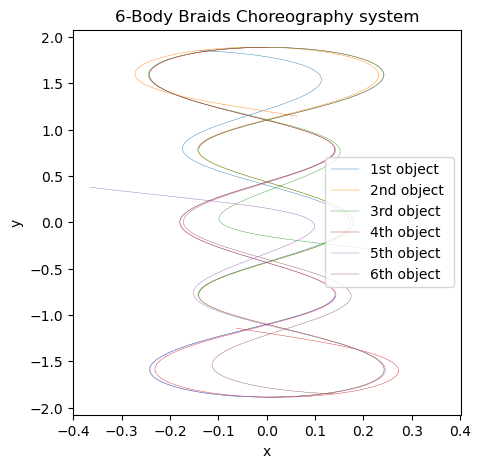

In [30]:
#Plotting the particle's paths and velocity 
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.plot(Obj_1_r[:,0],Obj_1_r[:,1],label='1st object ',lw=0.3)
ax.plot(Obj_2_r[:,0],Obj_2_r[:,1],label='2nd object ',lw=0.3)
ax.plot(Obj_3_r[:,0],Obj_3_r[:,1],label='3rd object ',lw=0.3)
ax.plot(Obj_4_r[:,0],Obj_4_r[:,1],label='4th object ',lw=0.3)
ax.plot(Obj_5_r[:,0],Obj_5_r[:,1],label='5th object ',lw=0.3)
ax.plot(Obj_6_r[:,0],Obj_6_r[:,1],label='6th object ',lw=0.3)
ax.set_title('6-Body Braids Choreography system')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

[-15.00828813 -15.00789799 -15.00672801 ... -10.83417342 -10.82745419
 -10.82075948]


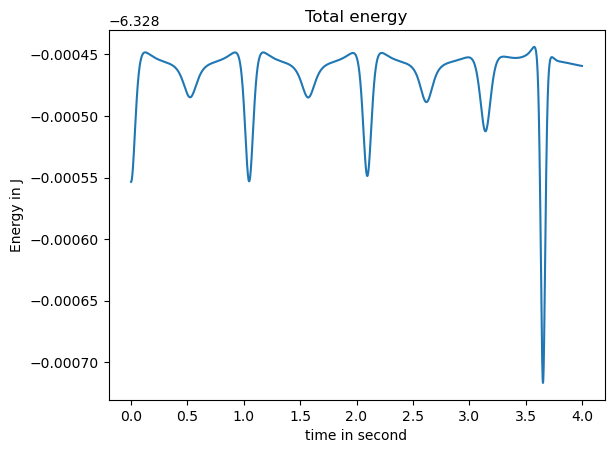

In [31]:
time=np.linspace(0,N*dt,N)
Total_E_8 = KE_8_C + PE_8_C
plt.plot(time,Total_E_8)
plt.title('Total energy')
plt.xlabel('time in second')
plt.ylabel('Energy in J')
print(PE_8_C)


Text(0, 0.5, 'Angular momentum in Kg.m2.s-1')

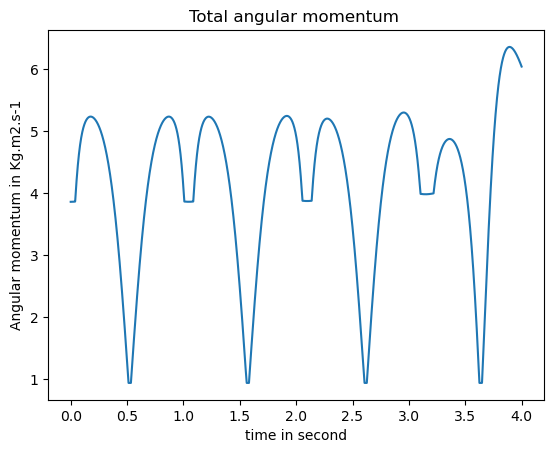

In [32]:
plt.plot(time,L_8_C)
plt.title('Total angular momentum ')
plt.xlabel('time in second')
plt.ylabel('Angular momentum in Kg.m2.s-1')